In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

16

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.39168 stdev: 0.28129
Best fitness: 0.90105 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.330
Mean genetic distance 2.880, standard deviation 0.472
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.641 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57419 stdev: 0.28210
Best fitness: 0.93445 - size: (2, 13) - species 4 - id 363
Average adjusted fitness: 0.480
Mean genetic distance 3.020, standard deviation 0.492
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.054 sec (5.847 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66332 stdev: 0.25866
Best fitness: 0.93445 - size: (2, 13) - species 23 - id 363
Average adjusted fitness: 0.542
Mean genetic distance 3.050, standard deviation 0.480
Population of 198 members in 32 species
Total extincti

Population's average fitness: 0.77009 stdev: 0.23636
Best fitness: 0.95609 - size: (5, 18) - species 35 - id 3505
Average adjusted fitness: 0.597
Mean genetic distance 3.209, standard deviation 0.543
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 8.770 sec (8.705 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73876 stdev: 0.26420
Best fitness: 0.95609 - size: (5, 18) - species 35 - id 3505
Average adjusted fitness: 0.593
Mean genetic distance 3.247, standard deviation 0.552
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 8.747 sec (8.667 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78813 stdev: 0.21208
Best fitness: 0.95609 - size: (5, 18) - species 35 - id 3505
Average adjusted fitness: 0.634
Mean genetic distance 3.231, standard deviation 0.559
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 9.162 sec (8.726 average)

 ******

Population's average fitness: 0.60536 stdev: 0.09234
Best fitness: 0.74706 - size: (4, 17) - species 26 - id 1378
Average adjusted fitness: 0.247
Mean genetic distance 3.156, standard deviation 0.489
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.472 sec (8.238 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60500 stdev: 0.09531
Best fitness: 0.74706 - size: (4, 17) - species 26 - id 1378
Average adjusted fitness: 0.249
Mean genetic distance 3.141, standard deviation 0.496
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.310 sec (8.295 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61247 stdev: 0.09595
Best fitness: 0.76314 - size: (2, 14) - species 26 - id 2563
Average adjusted fitness: 0.260
Mean genetic distance 3.133, standard deviation 0.485
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 8.296 sec (8.291 average)

 ******

Population's average fitness: 0.60257 stdev: 0.08165
Best fitness: 0.73779 - size: (3, 14) - species 20 - id 511
Average adjusted fitness: 0.228
Mean genetic distance 3.092, standard deviation 0.504
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.604 sec (7.031 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60080 stdev: 0.08612
Best fitness: 0.73779 - size: (3, 14) - species 20 - id 511
Average adjusted fitness: 0.225
Mean genetic distance 3.110, standard deviation 0.487
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.936 sec (7.144 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60764 stdev: 0.08101
Best fitness: 0.74212 - size: (2, 14) - species 26 - id 1332
Average adjusted fitness: 0.258
Mean genetic distance 3.136, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.913 sec (7.230 average)

 ****** Run

Population's average fitness: 0.62680 stdev: 0.09042
Best fitness: 0.77551 - size: (6, 24) - species 23 - id 3252
Average adjusted fitness: 0.232
Mean genetic distance 3.246, standard deviation 0.548
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 9.627 sec (8.982 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63088 stdev: 0.09492
Best fitness: 0.77551 - size: (6, 24) - species 23 - id 3252
Average adjusted fitness: 0.274
Mean genetic distance 3.251, standard deviation 0.565
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.242 sec (9.054 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61564 stdev: 0.10366
Best fitness: 0.77551 - size: (6, 24) - species 23 - id 3252
Average adjusted fitness: 0.260
Mean genetic distance 3.228, standard deviation 0.555
Population of 207 members in 19 species
Total extinctions: 0
Generation time: 9.891 sec (9.188 average)
number o

Population's average fitness: 0.62310 stdev: 0.09325
Best fitness: 0.76994 - size: (5, 19) - species 36 - id 1045
Average adjusted fitness: 0.238
Mean genetic distance 3.263, standard deviation 0.470
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 8.403 sec (8.315 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61778 stdev: 0.09916
Best fitness: 0.76994 - size: (5, 19) - species 36 - id 1045
Average adjusted fitness: 0.286
Mean genetic distance 3.281, standard deviation 0.474
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 8.426 sec (8.363 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61194 stdev: 0.09690
Best fitness: 0.76994 - size: (5, 19) - species 36 - id 1045
Average adjusted fitness: 0.215
Mean genetic distance 3.275, standard deviation 0.478
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.150 sec (8.364 average)

 ******

Population's average fitness: 0.73659 stdev: 0.14154
Best fitness: 0.85591 - size: (3, 15) - species 16 - id 916
Average adjusted fitness: 0.530
Mean genetic distance 3.187, standard deviation 0.494
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.983 sec (7.761 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72655 stdev: 0.15387
Best fitness: 0.85591 - size: (3, 15) - species 16 - id 916
Average adjusted fitness: 0.537
Mean genetic distance 3.181, standard deviation 0.499
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.359 sec (7.878 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72385 stdev: 0.16597
Best fitness: 0.85591 - size: (3, 15) - species 16 - id 916
Average adjusted fitness: 0.522
Mean genetic distance 3.187, standard deviation 0.488
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.215 sec (7.957 average)

 ****** Ru

Population's average fitness: 0.57231 stdev: 0.08597
Best fitness: 0.76438 - size: (3, 15) - species 26 - id 664
Average adjusted fitness: 0.294
Mean genetic distance 3.011, standard deviation 0.444
Population of 210 members in 35 species
Total extinctions: 0
Generation time: 7.405 sec (6.819 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57261 stdev: 0.09137
Best fitness: 0.76438 - size: (3, 15) - species 26 - id 664
Average adjusted fitness: 0.205
Mean genetic distance 3.066, standard deviation 0.437
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.666 sec (6.988 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58133 stdev: 0.08757
Best fitness: 0.76438 - size: (3, 15) - species 26 - id 664
Average adjusted fitness: 0.194
Mean genetic distance 3.065, standard deviation 0.450
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.310 sec (7.042 average)

 ****** Runn

Population's average fitness: 0.61606 stdev: 0.10005
Best fitness: 0.78850 - size: (10, 30) - species 9 - id 2923
Average adjusted fitness: 0.253
Mean genetic distance 3.157, standard deviation 0.507
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.775 sec (8.727 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60174 stdev: 0.10330
Best fitness: 0.78850 - size: (10, 30) - species 9 - id 2923
Average adjusted fitness: 0.234
Mean genetic distance 3.149, standard deviation 0.498
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 8.925 sec (8.788 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61539 stdev: 0.09180
Best fitness: 0.78850 - size: (10, 30) - species 9 - id 2923
Average adjusted fitness: 0.228
Mean genetic distance 3.165, standard deviation 0.496
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 9.103 sec (8.854 average)

 ******

Population's average fitness: 0.68645 stdev: 0.11791
Best fitness: 0.80581 - size: (4, 18) - species 24 - id 2332
Average adjusted fitness: 0.381
Mean genetic distance 3.098, standard deviation 0.476
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.236 sec (8.137 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69113 stdev: 0.12113
Best fitness: 0.80581 - size: (4, 18) - species 24 - id 2332
Average adjusted fitness: 0.449
Mean genetic distance 3.101, standard deviation 0.472
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.663 sec (8.200 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69818 stdev: 0.11185
Best fitness: 0.81880 - size: (6, 24) - species 33 - id 2788
Average adjusted fitness: 0.406
Mean genetic distance 3.137, standard deviation 0.464
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.782 sec (8.274 average)

 ******

Population's average fitness: 0.59979 stdev: 0.10040
Best fitness: 0.79221 - size: (4, 16) - species 17 - id 455
Average adjusted fitness: 0.221
Mean genetic distance 3.142, standard deviation 0.479
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 7.704 sec (7.215 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60932 stdev: 0.10134
Best fitness: 0.81200 - size: (5, 19) - species 17 - id 1587
Average adjusted fitness: 0.252
Mean genetic distance 3.191, standard deviation 0.486
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 8.173 sec (7.408 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60948 stdev: 0.09573
Best fitness: 0.83302 - size: (4, 17) - species 17 - id 1715
Average adjusted fitness: 0.298
Mean genetic distance 3.145, standard deviation 0.484
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.100 sec (7.545 average)

 ****** 

Population's average fitness: 0.43942 stdev: 0.21094
Best fitness: 0.82437 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.236
Mean genetic distance 2.848, standard deviation 0.447
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.552 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55288 stdev: 0.21281
Best fitness: 0.82437 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.344
Mean genetic distance 2.904, standard deviation 0.466
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.462 sec (7.507 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61711 stdev: 0.19827
Best fitness: 0.82437 - size: (2, 13) - species 8 - id 96
Average adjusted fitness: 0.399
Mean genetic distance 2.997, standard deviation 0.488
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.851 sec (7.288 average)

 ****** Running generation 3 *****

Population's average fitness: 0.72449 stdev: 0.16056
Best fitness: 0.85900 - size: (7, 23) - species 37 - id 3414
Average adjusted fitness: 0.518
Mean genetic distance 3.234, standard deviation 0.537
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 8.920 sec (8.637 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72756 stdev: 0.14568
Best fitness: 0.85900 - size: (7, 23) - species 37 - id 3414
Average adjusted fitness: 0.507
Mean genetic distance 3.245, standard deviation 0.544
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 8.737 sec (8.664 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72274 stdev: 0.15537
Best fitness: 0.85900 - size: (7, 23) - species 37 - id 3414
Average adjusted fitness: 0.513
Mean genetic distance 3.240, standard deviation 0.542
Population of 207 members in 23 species
Total extinctions: 0
Generation time: 9.359 sec (8.758 average)

 ******

Population's average fitness: 0.64191 stdev: 0.08985
Best fitness: 0.78169 - size: (3, 16) - species 31 - id 1136
Average adjusted fitness: 0.323
Mean genetic distance 3.136, standard deviation 0.482
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.221 sec (8.174 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64553 stdev: 0.09149
Best fitness: 0.78169 - size: (3, 16) - species 31 - id 1136
Average adjusted fitness: 0.337
Mean genetic distance 3.162, standard deviation 0.481
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.655 sec (8.273 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64337 stdev: 0.09422
Best fitness: 0.78169 - size: (3, 16) - species 31 - id 1136
Average adjusted fitness: 0.330
Mean genetic distance 3.172, standard deviation 0.483
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 9.140 sec (8.404 average)

 ******

Population's average fitness: 0.64418 stdev: 0.13111
Best fitness: 0.77798 - size: (4, 15) - species 36 - id 819
Average adjusted fitness: 0.347
Mean genetic distance 3.112, standard deviation 0.489
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.620 sec (7.349 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64833 stdev: 0.12963
Best fitness: 0.77798 - size: (4, 15) - species 1 - id 819
Average adjusted fitness: 0.413
Mean genetic distance 3.167, standard deviation 0.499
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.849 sec (7.412 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65788 stdev: 0.12205
Best fitness: 0.77798 - size: (4, 15) - species 1 - id 819
Average adjusted fitness: 0.356
Mean genetic distance 3.156, standard deviation 0.504
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.771 sec (7.452 average)

 ****** Runnin

Population's average fitness: 0.67097 stdev: 0.13504
Best fitness: 0.82931 - size: (7, 21) - species 15 - id 2485
Average adjusted fitness: 0.404
Mean genetic distance 3.269, standard deviation 0.525
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 9.756 sec (9.374 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65315 stdev: 0.14915
Best fitness: 0.82931 - size: (7, 21) - species 15 - id 2485
Average adjusted fitness: 0.404
Mean genetic distance 3.259, standard deviation 0.522
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.842 sec (9.462 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.68101 stdev: 0.12797
Best fitness: 0.82931 - size: (7, 21) - species 15 - id 2485
Average adjusted fitness: 0.382
Mean genetic distance 3.291, standard deviation 0.521
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.542 sec (9.619 average)
number 

Population's average fitness: 0.65796 stdev: 0.12904
Best fitness: 0.79777 - size: (6, 22) - species 26 - id 2146
Average adjusted fitness: 0.394
Mean genetic distance 3.220, standard deviation 0.551
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 8.757 sec (8.631 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65653 stdev: 0.12941
Best fitness: 0.79777 - size: (6, 22) - species 26 - id 2146
Average adjusted fitness: 0.357
Mean genetic distance 3.208, standard deviation 0.543
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 9.050 sec (8.676 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65235 stdev: 0.13440
Best fitness: 0.79777 - size: (6, 22) - species 26 - id 2146
Average adjusted fitness: 0.350
Mean genetic distance 3.216, standard deviation 0.528
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.904 sec (8.728 average)

 ******

Population's average fitness: 0.59599 stdev: 0.08058
Best fitness: 0.73531 - size: (7, 22) - species 30 - id 1668
Average adjusted fitness: 0.214
Mean genetic distance 3.115, standard deviation 0.479
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.901 sec (8.332 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60826 stdev: 0.07689
Best fitness: 0.74273 - size: (8, 25) - species 30 - id 2067
Average adjusted fitness: 0.201
Mean genetic distance 3.128, standard deviation 0.473
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.669 sec (8.465 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60567 stdev: 0.07773
Best fitness: 0.74273 - size: (8, 25) - species 30 - id 2067
Average adjusted fitness: 0.242
Mean genetic distance 3.112, standard deviation 0.473
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.305 sec (8.533 average)

 ******

Mean genetic distance 3.066, standard deviation 0.511
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.257 sec (6.955 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56279 stdev: 0.08806
Best fitness: 0.70192 - size: (3, 15) - species 4 - id 681
Average adjusted fitness: 0.188
Mean genetic distance 3.034, standard deviation 0.507
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.713 sec (7.107 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57539 stdev: 0.08716
Best fitness: 0.70192 - size: (3, 15) - species 4 - id 681
Average adjusted fitness: 0.198
Mean genetic distance 3.068, standard deviation 0.508
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.941 sec (7.579 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57395 stdev: 0.09300
Best fitness: 0.71429 - size: (4, 18) - species 27 - id 1012
Average

Mean genetic distance 3.240, standard deviation 0.545
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 8.683 sec (8.630 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61251 stdev: 0.09044
Best fitness: 0.74644 - size: (6, 22) - species 3 - id 4095
Average adjusted fitness: 0.216
Mean genetic distance 3.247, standard deviation 0.543
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 9.334 sec (8.715 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60729 stdev: 0.09851
Best fitness: 0.74644 - size: (6, 22) - species 3 - id 4095
Average adjusted fitness: 0.289
Mean genetic distance 3.238, standard deviation 0.542
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 9.524 sec (8.823 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61303 stdev: 0.09363
Best fitness: 0.74644 - size: (6, 22) - species 3 - id 4095
Ave

Mean genetic distance 3.143, standard deviation 0.547
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 8.530 sec (8.332 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61764 stdev: 0.09960
Best fitness: 0.78912 - size: (4, 16) - species 5 - id 1751
Average adjusted fitness: 0.215
Mean genetic distance 3.143, standard deviation 0.556
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 8.901 sec (8.338 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61339 stdev: 0.11371
Best fitness: 0.78912 - size: (4, 16) - species 5 - id 1751
Average adjusted fitness: 0.238
Mean genetic distance 3.176, standard deviation 0.555
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.581 sec (8.441 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62224 stdev: 0.10111
Best fitness: 0.78912 - size: (4, 16) - species 5 - id 1751
Ave

Mean genetic distance 3.121, standard deviation 0.502
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.572 sec (7.221 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61320 stdev: 0.09231
Best fitness: 0.80334 - size: (6, 20) - species 18 - id 1308
Average adjusted fitness: 0.277
Mean genetic distance 3.154, standard deviation 0.498
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 8.132 sec (7.410 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62236 stdev: 0.08974
Best fitness: 0.80334 - size: (6, 20) - species 18 - id 1308
Average adjusted fitness: 0.260
Mean genetic distance 3.131, standard deviation 0.508
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.952 sec (7.525 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61562 stdev: 0.09245
Best fitness: 0.80334 - size: (6, 20) - species 18 - id 1308


Population's average fitness: 0.55284 stdev: 0.10176
Best fitness: 0.80458 - size: (2, 13) - species 13 - id 250
Average adjusted fitness: 0.222
Mean genetic distance 2.985, standard deviation 0.488
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.629 sec (6.360 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57238 stdev: 0.10407
Best fitness: 0.80458 - size: (2, 13) - species 13 - id 250
Average adjusted fitness: 0.199
Mean genetic distance 2.990, standard deviation 0.462
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.132 sec (6.617 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59607 stdev: 0.10340
Best fitness: 0.80458 - size: (2, 13) - species 13 - id 250
Average adjusted fitness: 0.280
Mean genetic distance 3.053, standard deviation 0.459
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 7.537 sec (6.847 average)

 ****** Runn

Population's average fitness: 0.65956 stdev: 0.12186
Best fitness: 0.83550 - size: (8, 25) - species 36 - id 3696
Average adjusted fitness: 0.423
Mean genetic distance 3.246, standard deviation 0.528
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 9.201 sec (9.417 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66234 stdev: 0.11488
Best fitness: 0.84292 - size: (7, 22) - species 36 - id 3889
Average adjusted fitness: 0.264
Mean genetic distance 3.247, standard deviation 0.518
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.831 sec (9.392 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66816 stdev: 0.11653
Best fitness: 0.84292 - size: (7, 22) - species 36 - id 3889
Average adjusted fitness: 0.279
Mean genetic distance 3.250, standard deviation 0.512
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 8.892 sec (9.223 average)

 ******

Population's average fitness: 0.66263 stdev: 0.10969
Best fitness: 0.82251 - size: (6, 21) - species 22 - id 2075
Average adjusted fitness: 0.330
Mean genetic distance 3.258, standard deviation 0.475
Population of 197 members in 49 species
Total extinctions: 0
Generation time: 8.872 sec (8.375 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66395 stdev: 0.11258
Best fitness: 0.82251 - size: (7, 21) - species 29 - id 2208
Average adjusted fitness: 0.347
Mean genetic distance 3.257, standard deviation 0.480
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 10.442 sec (8.615 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66703 stdev: 0.09993
Best fitness: 0.82251 - size: (7, 21) - species 29 - id 2208
Average adjusted fitness: 0.270
Mean genetic distance 3.274, standard deviation 0.494
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 9.691 sec (8.749 average)

 *****

Population's average fitness: 0.61730 stdev: 0.10689
Best fitness: 0.82127 - size: (6, 18) - species 35 - id 916
Average adjusted fitness: 0.241
Mean genetic distance 3.103, standard deviation 0.491
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.954 sec (7.170 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61096 stdev: 0.11810
Best fitness: 0.82127 - size: (6, 18) - species 35 - id 916
Average adjusted fitness: 0.323
Mean genetic distance 3.092, standard deviation 0.489
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 7.816 sec (7.242 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61460 stdev: 0.11588
Best fitness: 0.82127 - size: (6, 18) - species 35 - id 916
Average adjusted fitness: 0.282
Mean genetic distance 3.110, standard deviation 0.504
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 7.565 sec (7.274 average)

 ****** Runn

Population's average fitness: 0.67287 stdev: 0.12620
Best fitness: 0.84910 - size: (12, 36) - species 15 - id 4139
Average adjusted fitness: 0.327
Mean genetic distance 3.265, standard deviation 0.505
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.000 sec (9.924 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66939 stdev: 0.12518
Best fitness: 0.84910 - size: (12, 36) - species 15 - id 4139
Average adjusted fitness: 0.370
Mean genetic distance 3.275, standard deviation 0.523
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 9.809 sec (9.610 average)
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.46220 stdev: 0.14371
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.214
Mean genetic distance 2.922, standard deviation 0.462
Population of 199 members in 28 species
Total extinctions: 0
Generati

Population's average fitness: 0.64807 stdev: 0.12335
Best fitness: 0.78912 - size: (6, 19) - species 10 - id 2708
Average adjusted fitness: 0.339
Mean genetic distance 3.281, standard deviation 0.506
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 9.010 sec (8.766 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66096 stdev: 0.10721
Best fitness: 0.78912 - size: (6, 19) - species 10 - id 2708
Average adjusted fitness: 0.357
Mean genetic distance 3.273, standard deviation 0.490
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.578 sec (8.874 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64992 stdev: 0.12531
Best fitness: 0.78912 - size: (6, 19) - species 10 - id 2708
Average adjusted fitness: 0.351
Mean genetic distance 3.246, standard deviation 0.502
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.442 sec (9.014 average)

 ******

Population's average fitness: 0.64345 stdev: 0.10489
Best fitness: 0.80891 - size: (7, 24) - species 27 - id 1805
Average adjusted fitness: 0.249
Mean genetic distance 3.162, standard deviation 0.492
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.458 sec (7.986 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63917 stdev: 0.10815
Best fitness: 0.80891 - size: (7, 24) - species 27 - id 1805
Average adjusted fitness: 0.276
Mean genetic distance 3.180, standard deviation 0.486
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.520 sec (8.246 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64011 stdev: 0.11059
Best fitness: 0.80891 - size: (7, 24) - species 27 - id 1805
Average adjusted fitness: 0.243
Mean genetic distance 3.189, standard deviation 0.478
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.764 sec (8.521 average)

 *****

Mean genetic distance 3.091, standard deviation 0.519
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.754 sec (6.325 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56963 stdev: 0.09085
Best fitness: 0.73593 - size: (3, 15) - species 11 - id 389
Average adjusted fitness: 0.198
Mean genetic distance 3.076, standard deviation 0.490
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 6.770 sec (6.399 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59224 stdev: 0.08203
Best fitness: 0.73593 - size: (3, 15) - species 11 - id 389
Average adjusted fitness: 0.217
Mean genetic distance 3.101, standard deviation 0.491
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.374 sec (6.538 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58619 stdev: 0.08954
Best fitness: 0.73902 - size: (5, 19) - species 6 - id 1180
Averag

Mean genetic distance 3.235, standard deviation 0.499
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.833 sec (8.647 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62932 stdev: 0.09592
Best fitness: 0.78108 - size: (10, 28) - species 44 - id 3358
Average adjusted fitness: 0.243
Mean genetic distance 3.221, standard deviation 0.500
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.644 sec (8.617 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61850 stdev: 0.10500
Best fitness: 0.78726 - size: (10, 28) - species 44 - id 4079
Average adjusted fitness: 0.329
Mean genetic distance 3.212, standard deviation 0.502
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.557 sec (8.672 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62120 stdev: 0.10100
Best fitness: 0.78726 - size: (10, 28) - species 44 - id 40

Mean genetic distance 3.271, standard deviation 0.510
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.020 sec (7.766 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70749 stdev: 0.13113
Best fitness: 0.88497 - size: (9, 27) - species 17 - id 3078
Average adjusted fitness: 0.404
Mean genetic distance 3.249, standard deviation 0.512
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 8.170 sec (7.822 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.69171 stdev: 0.12667
Best fitness: 0.88497 - size: (9, 27) - species 17 - id 3078
Average adjusted fitness: 0.297
Mean genetic distance 3.243, standard deviation 0.505
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.664 sec (7.918 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.70355 stdev: 0.11708
Best fitness: 0.88497 - size: (9, 27) - species 17 - id 3078


Mean genetic distance 3.207, standard deviation 0.465
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.317 sec (6.987 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71525 stdev: 0.17911
Best fitness: 0.89920 - size: (5, 20) - species 7 - id 1470
Average adjusted fitness: 0.495
Mean genetic distance 3.200, standard deviation 0.474
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.581 sec (7.135 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72062 stdev: 0.18085
Best fitness: 0.89920 - size: (5, 20) - species 7 - id 1470
Average adjusted fitness: 0.509
Mean genetic distance 3.202, standard deviation 0.488
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 7.351 sec (7.245 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71972 stdev: 0.17555
Best fitness: 0.89920 - size: (5, 20) - species 7 - id 1470
Ave

Total extinctions: 0
Generation time: 6.022 sec (5.846 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67042 stdev: 0.25826
Best fitness: 0.90538 - size: (3, 15) - species 7 - id 208
Average adjusted fitness: 0.526
Mean genetic distance 3.000, standard deviation 0.512
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 6.466 sec (6.053 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.73626 stdev: 0.23824
Best fitness: 0.91342 - size: (4, 16) - species 8 - id 692
Average adjusted fitness: 0.582
Mean genetic distance 3.040, standard deviation 0.505
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 6.624 sec (6.196 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.75480 stdev: 0.22228
Best fitness: 0.91342 - size: (4, 16) - species 8 - id 692
Average adjusted fitness: 0.594
Mean genetic distance 3.083, standard deviation 0.487
Population of 204


Population's average fitness: 0.77938 stdev: 0.20595
Best fitness: 0.92393 - size: (8, 23) - species 29 - id 3612
Average adjusted fitness: 0.669
Mean genetic distance 3.179, standard deviation 0.559
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 8.438 sec (7.947 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77179 stdev: 0.20554
Best fitness: 0.92393 - size: (8, 23) - species 29 - id 3612
Average adjusted fitness: 0.663
Mean genetic distance 3.179, standard deviation 0.558
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.380 sec (8.044 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.78184 stdev: 0.21035
Best fitness: 0.92764 - size: (6, 22) - species 34 - id 4438
Average adjusted fitness: 0.685
Mean genetic distance 3.197, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.609 sec (8.160 average)

 *****

Population's average fitness: 0.61986 stdev: 0.08190
Best fitness: 0.74892 - size: (6, 20) - species 24 - id 2259
Average adjusted fitness: 0.237
Mean genetic distance 3.155, standard deviation 0.496
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.036 sec (7.656 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61985 stdev: 0.08617
Best fitness: 0.74892 - size: (6, 20) - species 24 - id 2259
Average adjusted fitness: 0.234
Mean genetic distance 3.201, standard deviation 0.499
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.826 sec (7.734 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61673 stdev: 0.09047
Best fitness: 0.74892 - size: (6, 20) - species 24 - id 2259
Average adjusted fitness: 0.261
Mean genetic distance 3.194, standard deviation 0.491
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.784 sec (7.762 average)

 ******

Population's average fitness: 0.59731 stdev: 0.08561
Best fitness: 0.76067 - size: (5, 20) - species 31 - id 973
Average adjusted fitness: 0.197
Mean genetic distance 3.153, standard deviation 0.462
Population of 189 members in 42 species
Total extinctions: 0
Generation time: 8.054 sec (6.895 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60579 stdev: 0.08948
Best fitness: 0.76067 - size: (5, 20) - species 31 - id 973
Average adjusted fitness: 0.265
Mean genetic distance 3.191, standard deviation 0.452
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 7.251 sec (6.931 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60744 stdev: 0.08339
Best fitness: 0.76067 - size: (5, 20) - species 31 - id 973
Average adjusted fitness: 0.195
Mean genetic distance 3.188, standard deviation 0.465
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.394 sec (7.103 average)

 ****** Run

Population's average fitness: 0.63722 stdev: 0.09265
Best fitness: 0.78602 - size: (6, 19) - species 24 - id 4195
Average adjusted fitness: 0.234
Mean genetic distance 3.310, standard deviation 0.493
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.767 sec (8.379 average)
number of class1:963
number of class2:654

 ****** Running generation 0 ****** 

Population's average fitness: 0.47818 stdev: 0.09354
Best fitness: 0.73902 - size: (2, 13) - species 1 - id 159
Average adjusted fitness: 0.216
Mean genetic distance 2.789, standard deviation 0.452
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 5.696 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53952 stdev: 0.09448
Best fitness: 0.75015 - size: (2, 14) - species 2 - id 371
Average adjusted fitness: 0.208
Mean genetic distance 2.970, standard deviation 0.443
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.880 sec (5.7

Population's average fitness: 0.62404 stdev: 0.10698
Best fitness: 0.82127 - size: (8, 23) - species 4 - id 2684
Average adjusted fitness: 0.254
Mean genetic distance 3.197, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.325 sec (8.125 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63647 stdev: 0.09633
Best fitness: 0.82127 - size: (8, 23) - species 4 - id 2684
Average adjusted fitness: 0.235
Mean genetic distance 3.205, standard deviation 0.479
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.207 sec (8.012 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63349 stdev: 0.10492
Best fitness: 0.82127 - size: (8, 23) - species 4 - id 2684
Average adjusted fitness: 0.326
Mean genetic distance 3.184, standard deviation 0.473
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.025 sec (7.966 average)

 ****** Ru

Population's average fitness: 0.64209 stdev: 0.09553
Best fitness: 0.81323 - size: (4, 17) - species 12 - id 1833
Average adjusted fitness: 0.291
Mean genetic distance 3.183, standard deviation 0.445
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 7.549 sec (7.350 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63723 stdev: 0.10185
Best fitness: 0.81323 - size: (4, 17) - species 12 - id 1833
Average adjusted fitness: 0.251
Mean genetic distance 3.202, standard deviation 0.454
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 7.681 sec (7.429 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64762 stdev: 0.09220
Best fitness: 0.81323 - size: (4, 17) - species 12 - id 1833
Average adjusted fitness: 0.304
Mean genetic distance 3.235, standard deviation 0.467
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 7.653 sec (7.458 average)

 ******

Population's average fitness: 0.60716 stdev: 0.08201
Best fitness: 0.76623 - size: (3, 16) - species 37 - id 555
Average adjusted fitness: 0.232
Mean genetic distance 3.181, standard deviation 0.498
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.971 sec (6.450 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61433 stdev: 0.08607
Best fitness: 0.77489 - size: (5, 19) - species 37 - id 1055
Average adjusted fitness: 0.293
Mean genetic distance 3.169, standard deviation 0.476
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 6.835 sec (6.505 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61706 stdev: 0.09018
Best fitness: 0.77489 - size: (5, 19) - species 37 - id 1055
Average adjusted fitness: 0.309
Mean genetic distance 3.166, standard deviation 0.479
Population of 201 members in 48 species
Total extinctions: 0
Generation time: 7.047 sec (6.573 average)

 ****** Ru

Population's average fitness: 0.65099 stdev: 0.09896
Best fitness: 0.81076 - size: (7, 26) - species 54 - id 3465
Average adjusted fitness: 0.308
Mean genetic distance 3.323, standard deviation 0.497
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.628 sec (7.710 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65471 stdev: 0.09497
Best fitness: 0.81076 - size: (7, 26) - species 54 - id 3465
Average adjusted fitness: 0.262
Mean genetic distance 3.319, standard deviation 0.504
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.081 sec (7.758 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65656 stdev: 0.10316
Best fitness: 0.81076 - size: (7, 26) - species 54 - id 3465
Average adjusted fitness: 0.259
Mean genetic distance 3.310, standard deviation 0.502
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.854 sec (7.775 average)

 ******

Population's average fitness: 0.66931 stdev: 0.11788
Best fitness: 0.80705 - size: (7, 21) - species 40 - id 1751
Average adjusted fitness: 0.363
Mean genetic distance 3.237, standard deviation 0.526
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.886 sec (7.609 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65636 stdev: 0.13990
Best fitness: 0.80705 - size: (7, 21) - species 40 - id 1751
Average adjusted fitness: 0.390
Mean genetic distance 3.205, standard deviation 0.521
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.954 sec (7.669 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66496 stdev: 0.13040
Best fitness: 0.81076 - size: (7, 24) - species 25 - id 2983
Average adjusted fitness: 0.362
Mean genetic distance 3.206, standard deviation 0.520
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 8.003 sec (7.718 average)

 ******

Population's average fitness: 0.62511 stdev: 0.15050
Best fitness: 0.78417 - size: (6, 21) - species 1 - id 1378
Average adjusted fitness: 0.348
Mean genetic distance 3.186, standard deviation 0.496
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.676 sec (6.990 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64386 stdev: 0.13781
Best fitness: 0.78417 - size: (6, 21) - species 1 - id 1378
Average adjusted fitness: 0.336
Mean genetic distance 3.204, standard deviation 0.504
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.527 sec (7.045 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63264 stdev: 0.15686
Best fitness: 0.78973 - size: (5, 19) - species 26 - id 2035
Average adjusted fitness: 0.380
Mean genetic distance 3.179, standard deviation 0.496
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.475 sec (7.140 average)

 ****** R

Population's average fitness: 0.57595 stdev: 0.07877
Best fitness: 0.75015 - size: (3, 15) - species 6 - id 452
Average adjusted fitness: 0.225
Mean genetic distance 3.029, standard deviation 0.474
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.477 sec (6.098 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58912 stdev: 0.07946
Best fitness: 0.78479 - size: (3, 15) - species 34 - id 633
Average adjusted fitness: 0.231
Mean genetic distance 3.097, standard deviation 0.484
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.629 sec (6.231 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58945 stdev: 0.08582
Best fitness: 0.78479 - size: (3, 15) - species 34 - id 633
Average adjusted fitness: 0.257
Mean genetic distance 3.125, standard deviation 0.481
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.817 sec (6.348 average)

 ****** Runni

Population's average fitness: 0.63503 stdev: 0.09083
Best fitness: 0.79283 - size: (5, 21) - species 34 - id 2384
Average adjusted fitness: 0.233
Mean genetic distance 3.223, standard deviation 0.474
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.507 sec (8.012 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63710 stdev: 0.08940
Best fitness: 0.79283 - size: (5, 21) - species 34 - id 2384
Average adjusted fitness: 0.318
Mean genetic distance 3.228, standard deviation 0.488
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.421 sec (8.051 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63454 stdev: 0.09577
Best fitness: 0.79283 - size: (5, 21) - species 34 - id 2384
Average adjusted fitness: 0.257
Mean genetic distance 3.253, standard deviation 0.498
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.694 sec (8.163 average)

 ******

Population's average fitness: 0.63873 stdev: 0.08580
Best fitness: 0.77180 - size: (4, 18) - species 2 - id 2261
Average adjusted fitness: 0.265
Mean genetic distance 3.201, standard deviation 0.544
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 8.331 sec (7.714 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64837 stdev: 0.08026
Best fitness: 0.77180 - size: (4, 18) - species 2 - id 2261
Average adjusted fitness: 0.261
Mean genetic distance 3.208, standard deviation 0.542
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.376 sec (7.717 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63222 stdev: 0.09918
Best fitness: 0.77180 - size: (4, 18) - species 2 - id 2261
Average adjusted fitness: 0.268
Mean genetic distance 3.188, standard deviation 0.532
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.656 sec (7.751 average)

 ****** Ru

Mean genetic distance 3.152, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.547 sec (6.727 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66613 stdev: 0.12191
Best fitness: 0.79592 - size: (4, 16) - species 32 - id 1099
Average adjusted fitness: 0.379
Mean genetic distance 3.164, standard deviation 0.487
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.279 sec (6.783 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67839 stdev: 0.10123
Best fitness: 0.79592 - size: (4, 16) - species 32 - id 1099
Average adjusted fitness: 0.386
Mean genetic distance 3.173, standard deviation 0.482
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.222 sec (6.930 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67209 stdev: 0.11522
Best fitness: 0.79592 - size: (4, 16) - species 32 - id 1099
A

Mean genetic distance 3.299, standard deviation 0.516
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 8.353 sec (8.478 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48098 stdev: 0.07683
Best fitness: 0.64750 - size: (2, 13) - species 1 - id 116
Average adjusted fitness: 0.166
Mean genetic distance 2.836, standard deviation 0.496
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 5.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52498 stdev: 0.07685
Best fitness: 0.68027 - size: (3, 14) - species 13 - id 379
Average adjusted fitness: 0.176
Mean genetic distance 3.017, standard deviation 0.506
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.033 sec (5.882 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55725 stdev: 0.06918
Best fitness: 0.68027 - size: (3, 14) - s

Mean genetic distance 3.339, standard deviation 0.489
Population of 209 members in 32 species
Total extinctions: 0
Generation time: 8.042 sec (7.959 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59033 stdev: 0.08070
Best fitness: 0.71181 - size: (7, 18) - species 21 - id 3444
Average adjusted fitness: 0.196
Mean genetic distance 3.343, standard deviation 0.495
Population of 210 members in 32 species
Total extinctions: 0
Generation time: 9.290 sec (8.118 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58702 stdev: 0.07768
Best fitness: 0.71181 - size: (7, 18) - species 21 - id 3444
Average adjusted fitness: 0.192
Mean genetic distance 3.347, standard deviation 0.484
Population of 209 members in 32 species
Total extinctions: 0
Generation time: 9.480 sec (8.295 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60286 stdev: 0.07359
Best fitness: 0.71490 - size: (9, 23) - species 14 - id 3707


Mean genetic distance 3.121, standard deviation 0.490
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 7.069 sec (6.956 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68369 stdev: 0.13006
Best fitness: 0.84663 - size: (4, 14) - species 26 - id 1725
Average adjusted fitness: 0.397
Mean genetic distance 3.136, standard deviation 0.488
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 6.989 sec (6.996 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67759 stdev: 0.13102
Best fitness: 0.84663 - size: (4, 14) - species 26 - id 1725
Average adjusted fitness: 0.410
Mean genetic distance 3.160, standard deviation 0.496
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 7.103 sec (7.009 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67500 stdev: 0.14178
Best fitness: 0.84663 - size: (4, 14) - species 26 - id 1725


Mean genetic distance 3.045, standard deviation 0.497
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.906 sec (6.725 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58723 stdev: 0.07743
Best fitness: 0.74706 - size: (4, 16) - species 9 - id 984
Average adjusted fitness: 0.150
Mean genetic distance 3.085, standard deviation 0.498
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 6.975 sec (6.761 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59125 stdev: 0.07882
Best fitness: 0.74954 - size: (6, 20) - species 9 - id 1298
Average adjusted fitness: 0.157
Mean genetic distance 3.085, standard deviation 0.494
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.927 sec (6.782 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58952 stdev: 0.08358
Best fitness: 0.75510 - size: (6, 24) - species 8 - id 1430
Average

Mean genetic distance 3.279, standard deviation 0.522
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 8.237 sec (8.422 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62105 stdev: 0.09103
Best fitness: 0.77304 - size: (8, 24) - species 9 - id 4237
Average adjusted fitness: 0.264
Mean genetic distance 3.298, standard deviation 0.507
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.229 sec (8.377 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61629 stdev: 0.09049
Best fitness: 0.77304 - size: (8, 24) - species 9 - id 4237
Average adjusted fitness: 0.228
Mean genetic distance 3.309, standard deviation 0.515
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.700 sec (8.411 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61938 stdev: 0.08794
Best fitness: 0.77304 - size: (8, 24) - species 9 - id 4237
Ave

Mean genetic distance 3.236, standard deviation 0.518
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.838 sec (7.948 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66419 stdev: 0.15105
Best fitness: 0.86951 - size: (8, 22) - species 33 - id 2155
Average adjusted fitness: 0.375
Mean genetic distance 3.272, standard deviation 0.512
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.029 sec (7.972 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66348 stdev: 0.15184
Best fitness: 0.86951 - size: (8, 22) - species 33 - id 2155
Average adjusted fitness: 0.427
Mean genetic distance 3.269, standard deviation 0.505
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.503 sec (8.022 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66938 stdev: 0.14939
Best fitness: 0.86951 - size: (8, 22) - species 33 - id 2155


Mean genetic distance 3.068, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.894 sec (6.867 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61975 stdev: 0.09370
Best fitness: 0.76933 - size: (6, 21) - species 35 - id 1698
Average adjusted fitness: 0.285
Mean genetic distance 3.065, standard deviation 0.486
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.345 sec (6.984 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63205 stdev: 0.09040
Best fitness: 0.76933 - size: (6, 21) - species 35 - id 1698
Average adjusted fitness: 0.335
Mean genetic distance 3.059, standard deviation 0.496
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.339 sec (7.067 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62484 stdev: 0.10072
Best fitness: 0.76933 - size: (6, 21) - species 35 - id 1698



Population's average fitness: 0.57511 stdev: 0.09392
Best fitness: 0.74954 - size: (4, 17) - species 6 - id 486
Average adjusted fitness: 0.263
Mean genetic distance 3.087, standard deviation 0.490
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.831 sec (6.298 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59076 stdev: 0.09352
Best fitness: 0.75881 - size: (3, 17) - species 31 - id 710
Average adjusted fitness: 0.228
Mean genetic distance 3.116, standard deviation 0.493
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.827 sec (6.403 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60300 stdev: 0.09209
Best fitness: 0.76562 - size: (3, 15) - species 13 - id 946
Average adjusted fitness: 0.210
Mean genetic distance 3.155, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.335 sec (6.559 average)

 ****** Runn

Population's average fitness: 0.64242 stdev: 0.12158
Best fitness: 0.84292 - size: (7, 24) - species 23 - id 3227
Average adjusted fitness: 0.349
Mean genetic distance 3.331, standard deviation 0.524
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.942 sec (8.871 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65224 stdev: 0.11202
Best fitness: 0.84292 - size: (7, 24) - species 23 - id 3227
Average adjusted fitness: 0.319
Mean genetic distance 3.344, standard deviation 0.526
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.807 sec (8.945 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65083 stdev: 0.11350
Best fitness: 0.84292 - size: (7, 24) - species 23 - id 3227
Average adjusted fitness: 0.248
Mean genetic distance 3.357, standard deviation 0.527
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.988 sec (9.019 average)

 ******

Population's average fitness: 0.66018 stdev: 0.10739
Best fitness: 0.75263 - size: (6, 21) - species 24 - id 1794
Average adjusted fitness: 0.364
Mean genetic distance 3.151, standard deviation 0.472
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 7.247 sec (7.323 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65482 stdev: 0.11930
Best fitness: 0.75263 - size: (6, 21) - species 24 - id 1794
Average adjusted fitness: 0.370
Mean genetic distance 3.177, standard deviation 0.490
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.348 sec (7.355 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64162 stdev: 0.12113
Best fitness: 0.75263 - size: (6, 21) - species 24 - id 1794
Average adjusted fitness: 0.349
Mean genetic distance 3.160, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.391 sec (7.491 average)

 ******

Population's average fitness: 0.61165 stdev: 0.09081
Best fitness: 0.75881 - size: (4, 18) - species 31 - id 1125
Average adjusted fitness: 0.297
Mean genetic distance 3.208, standard deviation 0.454
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.276 sec (6.723 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61064 stdev: 0.09046
Best fitness: 0.75881 - size: (4, 18) - species 31 - id 1125
Average adjusted fitness: 0.300
Mean genetic distance 3.213, standard deviation 0.462
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.428 sec (6.907 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60856 stdev: 0.09899
Best fitness: 0.75881 - size: (4, 18) - species 31 - id 1125
Average adjusted fitness: 0.296
Mean genetic distance 3.223, standard deviation 0.463
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.689 sec (7.086 average)

 ******

Population's average fitness: 0.50136 stdev: 0.05898
Best fitness: 0.67780 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.164
Mean genetic distance 2.903, standard deviation 0.489
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.654 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53368 stdev: 0.06381
Best fitness: 0.70439 - size: (2, 13) - species 5 - id 365
Average adjusted fitness: 0.140
Mean genetic distance 3.036, standard deviation 0.495
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.989 sec (5.822 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54714 stdev: 0.06284
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 365
Average adjusted fitness: 0.139
Mean genetic distance 3.123, standard deviation 0.506
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.501 sec (6.048 average)

 ****** Running generation 3 **

Population's average fitness: 0.60097 stdev: 0.08030
Best fitness: 0.74706 - size: (5, 18) - species 44 - id 2488
Average adjusted fitness: 0.187
Mean genetic distance 3.277, standard deviation 0.503
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.231 sec (7.584 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60288 stdev: 0.08158
Best fitness: 0.75139 - size: (7, 25) - species 15 - id 3304
Average adjusted fitness: 0.209
Mean genetic distance 3.302, standard deviation 0.503
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 8.126 sec (7.682 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60934 stdev: 0.07685
Best fitness: 0.75139 - size: (7, 25) - species 15 - id 3304
Average adjusted fitness: 0.214
Mean genetic distance 3.297, standard deviation 0.500
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.230 sec (7.747 average)

 ******

Population's average fitness: 0.69589 stdev: 0.13395
Best fitness: 0.86085 - size: (7, 21) - species 22 - id 2152
Average adjusted fitness: 0.442
Mean genetic distance 3.172, standard deviation 0.470
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.758 sec (7.461 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70842 stdev: 0.13096
Best fitness: 0.86085 - size: (7, 21) - species 22 - id 2152
Average adjusted fitness: 0.447
Mean genetic distance 3.185, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.838 sec (7.542 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71954 stdev: 0.12049
Best fitness: 0.86085 - size: (7, 21) - species 22 - id 2152
Average adjusted fitness: 0.428
Mean genetic distance 3.174, standard deviation 0.477
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.822 sec (7.594 average)

 ******

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.75

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  1]
 [ 0  7  0  1  0  0  0  0  0  2]
 [ 0  0 14  0  0  0  0  0  1  0]
 [ 0  0  3  9  0  0  0  1  0  6]
 [ 0  1  0  0 18  1  0  0  1  0]
 [ 0  1  0  4  1 17  2  0  0  1]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  1  0  0  0 17  1  0]
 [ 0 10  0  3  1  0  0  1 14  1]
 [ 0  0  0  0  0  0  0  0  0  7]]


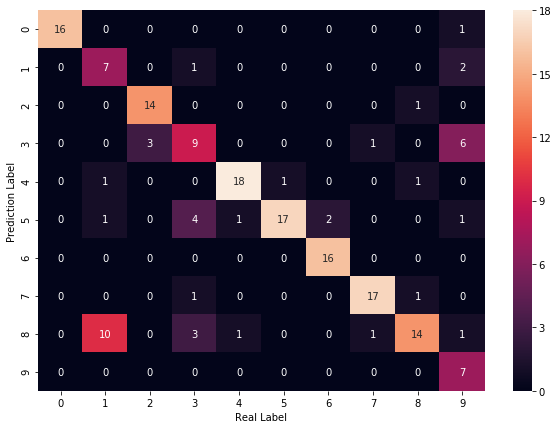

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:6 index:[5] real:5
#1 min_error:6 index:[2] real:2
#2 min_error:10 index:[8] real:8
#3 min_error:2 index:[0] real:0
#4 min_error:7 index:[1] real:1
#5 min_error:8 index:[7] real:7
#6 min_error:7 index:[6] real:6
#7 min_error:6 index:[3] real:3
#8 min_error:6 index:[2] real:2
#9 min_error:10 index:[1] real:1
#10 min_error:14 index:[7] real:7
#11 min_error:12 index:[8] real:4
#12 min_error:8 index:[6] real:6
#13 min_error:3 index:[3] real:3
#14 min_error:13 index:[1] real:1
#15 min_error:5 index:[3] real:3
#16 min_error:13 index:[1] real:9
#17 min_error:9 index:[1] real:1
#18 min_error:10 index:[7 8] real:7
#19 min_error:6 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:4 index:[4] real:4
#22 min_error:6 index:[3] real:3
#23 min_error:11 index:[1] real:1
#24 min_error:3 index:[4] real:4
#25 min_error:4 index:[0] real:0
#26 min_error:3 index:[5] real:5
#27 min_error:3 index:[3] real:3
#28 min_error:11 index:[5] real:6
#29 min_error:12 index:[3] real:9
#30 min

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8164089878375593

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.2
Accuracy on training set: 0.15555555555555556
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.28888888888888886
Accuracy on training set: 0.37777777777777777
Accuracy on training set: 0.4111111111111111
Accuracy on training set: 0.4111111111111111
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.4388888888888889
Accuracy on training set: 0.4666666666666667
Accuracy on training set: 0.4666666666666667
Accuracy on training set: 0.5
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.55
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.65
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.72222

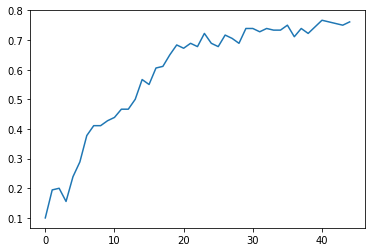

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.1,
 0.19444444444444445,
 0.2,
 0.15555555555555556,
 0.2388888888888889,
 0.28888888888888886,
 0.37777777777777777,
 0.4111111111111111,
 0.4111111111111111,
 0.42777777777777776,
 0.4388888888888889,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5666666666666667,
 0.55,
 0.6055555555555555,
 0.6111111111111112,
 0.65,
 0.6833333333333333,
 0.6722222222222223,
 0.6888888888888889,
 0.6777777777777778,
 0.7222222222222222,
 0.6888888888888889,
 0.6777777777777778,
 0.7166666666666667,
 0.7055555555555556,
 0.6888888888888889,
 0.7388888888888889,
 0.7388888888888889,
 0.7277777777777777,
 0.7388888888888889,
 0.7333333333333333,
 0.7333333333333333,
 0.75,
 0.7111111111111111,
 0.7388888888888889,
 0.7222222222222222,
 0.7444444444444445,
 0.7666666666666667,
 0.7611111111111111,
 0.7555555555555555,
 0.75,
 0.7611111111111111]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8293135435992579
Avg Base Learner:0.8164089878375593
